# Datos históricos de flota de taxis en Madrid

Debido a la falta de datos, queremos resaltar que para este trabajo no vamos a utilizar el tema de nuestro TFM.

Hemos utilizado una base de datos sobre la flota de taxis dentro de la ciudad de Madrid. Vamos a usar información como las marcas, el combustible y la cilindrada y potencia de los vehiculos para realizar un análisis exploratorio, teniendo en cuenta las limitaciones del tipo de variables a la hora de hacer gráficos.

El objetivo de nuestro trabajo es aprender a limpiar una base de datos, transformar, visualizar e interpretar las principales variables.

Para ello, en primer lugar, hemos importado el archivo csv *TaxiFlota*.
Luego, hemos realizado la limpieza de datos (cambio de *str* a *int*, cambiar el nombre de las columnas, eliminar columnas, formato fecha, etc.)

Por último hemos hecho algunas representaciones gráficas con las variables más relevantes.

## 1. Obtención de los datos 
Importación de la base de datos *Taxi Flota* de la base de datos abiertos de Madrid, en formato .csv

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('TaxiFlota.csv' , encoding = 'latin-1', sep = ";")
df.head(10)

,Código,Matrícula,Fecha Matriculación,Marca,Modelo,Tipo,Variante,Clasificación medioambiental,Combustible,Cilindrada,Potencia,Número de Plazas,Fecha inicio de prestación del servicio de taxi,Eurotaxi,Régimen Especial de Eurotaxi,Fecha inicio Régimen Especial Eurotaxi,Fecha fin Régimen Especial Eurotaxi,Fecha
0,1020144,2239DTJ,13/12/2005,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.00,NaN,16/12/2005,NO,NO,NaN,NaN,30/07/2018
1,550040,8901GJP,21/11/2008,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.00,NaN,11/12/2008,NO,NO,NaN,NaN,30/07/2018
2,550016,6364FVW,14/12/2007,SEAT,TOLEDO,NaN,NaN,NaN,DIESEL,0,12.00,NaN,18/11/2008,NO,NO,NaN,NaN,30/07/2018
3,550115,4249GST,08/01/2010,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.00,NaN,14/01/2010,NO,NO,NaN,NaN,30/07/2018
4,550142,1561GVY,27/04/2010,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.00,NaN,01/03/2010,NO,NO,NaN,NaN,30/07/2018
5,550214,6296HBZ,28/02/2011,SKODA,OCTAVIA,1Z,AACAYCX01/NFM5,NaN,DIESEL,0,11.64,NaN,03/08/2012,NO,NO,NaN,NaN,30/07/2018
6,550241,9097GYH,16/08/2010,VOLKSWAGEN,PASSAT,3C,AACBBBX0/FM6FM6*******,NaN,DIESEL,0,13.00,NaN,10/01/2013,NO,NO,NaN,NaN,30/07/2018
7,550244,3091HJM,29/02/2012,PEUGEOT,508,8,8D9HRB/PS,NaN,DIESEL,0,82.00,NaN,23/08/2013,NO,NO,NaN,NaN,30/07/2018
8,1198109,0800GZC,18/10/2010,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,110.00,5,25/10/2010,NO,NO,NaN,NaN,30/07/2018
9,1196804,7686GYS,23/09/2010,CHEVROLET,EPICA,KLAL,LV1/111,C,GASOLINA TRANSFORMADO GLP,1993,105.00,5,04/10/2010,NO,NO,NaN,NaN,30/07/2018


## 2. Tratamiento y limpieza

Hemos cambiado el nombre de las columnas para que sean representativos y usables, cambiado el tipo de variables según les corresponda y eliminado variables que no tenían información relevante para nuestro análisis.

In [2]:
df["Clasificación medioambiental"].value_counts()

ECO    20829
B      14927
C      11116
0         46
Name: Clasificación medioambiental, dtype: int64

#### 1. Renombrar los nombres de las columnas
  
  1.1 Cambiar los títulos a minúsculas

In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['código', 'matrícula', 'fecha matriculación', 'marca', 'modelo', 'tipo',
       'variante', 'clasificación medioambiental', 'combustible', 'cilindrada',
       'potencia', 'número de plazas',
       'fecha inicio de prestación del servicio de taxi', 'eurotaxi',
       'régimen especial de eurotaxi',
       'fecha inicio régimen especial eurotaxi',
       'fecha fin régimen especial eurotaxi', 'fecha'],
      dtype='object')

   1.2. Sustituir los espacios por "_"

In [4]:
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['código', 'matrícula', 'fecha_matriculación', 'marca', 'modelo', 'tipo',
       'variante', 'clasificación_medioambiental', 'combustible', 'cilindrada',
       'potencia', 'número_de_plazas',
       'fecha_inicio_de_prestación_del_servicio_de_taxi', 'eurotaxi',
       'régimen_especial_de_eurotaxi',
       'fecha_inicio_régimen_especial_eurotaxi',
       'fecha_fin_régimen_especial_eurotaxi', 'fecha'],
      dtype='object')

  1.3 Quitar tildes y caracteres especiales

In [5]:
df.columns = df.columns.str.replace("á", "a").str.replace("é", "e").str.replace("í", "i").str.replace("ó", "o").str.replace("ú", "u").str.replace("ñ", "n")
df.columns

Index(['codigo', 'matricula', 'fecha_matriculacion', 'marca', 'modelo', 'tipo',
       'variante', 'clasificacion_medioambiental', 'combustible', 'cilindrada',
       'potencia', 'numero_de_plazas',
       'fecha_inicio_de_prestacion_del_servicio_de_taxi', 'eurotaxi',
       'regimen_especial_de_eurotaxi',
       'fecha_inicio_regimen_especial_eurotaxi',
       'fecha_fin_regimen_especial_eurotaxi', 'fecha'],
      dtype='object')

  1.4. Renombrar manualmente las columnas con nombres más largos

In [6]:
df = df.rename(columns= {'numero_de_plazas':'numero_plazas',
                   'fecha_inicio_de_prestacion_del_servicio_de_taxi':'fecha_inicio', 
                   'regimen_especial_de_eurotaxi':'regimen_eurotaxi', 
                   'fecha_inicio_regimen_especial_eurotaxi':'fecha_inicio_eurotaxi', 
                   'fecha_fin_regimen_especial_eurotaxi':'fecha_fin_eurotaxi'})
df.columns

Index(['codigo', 'matricula', 'fecha_matriculacion', 'marca', 'modelo', 'tipo',
       'variante', 'clasificacion_medioambiental', 'combustible', 'cilindrada',
       'potencia', 'numero_plazas', 'fecha_inicio', 'eurotaxi',
       'regimen_eurotaxi', 'fecha_inicio_eurotaxi', 'fecha_fin_eurotaxi',
       'fecha'],
      dtype='object')

#### 2. Convertir las variables a los tipos correspondientes

  2.1 Inspeccionar el tipo de variables

In [7]:
df.dtypes

codigo                            int64
matricula                        object
fecha_matriculacion              object
marca                            object
modelo                           object
tipo                             object
variante                         object
clasificacion_medioambiental     object
combustible                      object
cilindrada                        int64
potencia                        float64
numero_plazas                    object
fecha_inicio                     object
eurotaxi                         object
regimen_eurotaxi                 object
fecha_inicio_eurotaxi            object
fecha_fin_eurotaxi               object
fecha                            object
dtype: object

2.2 Identificar las variables a cambiar:

- **codigo**: int -> object
- **matricula**: OK
- **fecha_matriculacion**: object -> date
- **marca**: OK
- **modelo**: OK
- **tipo**: borrar, aporta poca información
- **variante**: borrar, aporta poca información
- **clasificacion_medioambiental**: object -> category
- **combustible**: OK
- **cilindrada**: OK
- **potencia**: int -> float
- **numero_plazas**: object -> int
- **fecha_inicio**: object -> date
- **eurotaxi**: OK, cambiar *'si'* y *'no'* por *'0'* y *'1'*
- **regimen_eurotaxi**: OK, cambiar *'si'* y *'no'* por *'0'* y *'1'*
- **fecha_inicio_eurotaxi**: borrar, aporta poca información
- **fecha_fin_eurotaxi**: borrar, aporta poca información
- **fecha**: borrar, aporta poca información

In [8]:
# codigo
df.codigo = df.codigo.astype('object')

In [9]:
# fecha_matriculación

from datetime import date, datetime
import re
formato = '%d/%m/%Y'

def parsea_fecha(fecha):
    try:
        a = datetime.strptime(fecha,formato)
        return a
    except:
        return None

df.fecha_matriculacion = df.fecha_matriculacion.apply(parsea_fecha)

In [10]:
# clasificacion_medioambiental
df["clasificacion_medioambiental"] = pd.Categorical(df["clasificacion_medioambiental"], ["0", "ECO", "C", "B"])
df.clasificacion_medioambiental.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: clasificacion_medioambiental, dtype: category
Categories (4, object): [0, ECO, C, B]

In [11]:
# potencia

def a_numero(numero):
    try:
        a = pd.to_numeric(numero)
        return a
    except:
        return None

df.potencia = df.potencia.apply(a_numero)
df.head()

,codigo,matricula,fecha_matriculacion,marca,modelo,tipo,variante,clasificacion_medioambiental,combustible,cilindrada,potencia,numero_plazas,fecha_inicio,eurotaxi,regimen_eurotaxi,fecha_inicio_eurotaxi,fecha_fin_eurotaxi,fecha
0,1020144,2239DTJ,2005-12-13,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.0,NaN,16/12/2005,NO,NO,NaN,NaN,30/07/2018
1,550040,8901GJP,2008-11-21,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.0,NaN,11/12/2008,NO,NO,NaN,NaN,30/07/2018
2,550016,6364FVW,2007-12-14,SEAT,TOLEDO,NaN,NaN,NaN,DIESEL,0,12.0,NaN,18/11/2008,NO,NO,NaN,NaN,30/07/2018
3,550115,4249GST,2010-01-08,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.0,NaN,14/01/2010,NO,NO,NaN,NaN,30/07/2018
4,550142,1561GVY,2010-04-27,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,12.0,NaN,01/03/2010,NO,NO,NaN,NaN,30/07/2018


In [12]:
# numero_plazas
df.numero_plazas = df.numero_plazas.astype('object')
df.numero_plazas.value_counts(dropna=False)

5                           45515
7                             551
de 5+1PMR a 7 plazas (*)      250
6                             192
9                             164
5 + 1 PMR                     117
de 5+1PMR a 9 plazas (*)       66
8                              39
NaN                            24
5+2PMR                          6
5+1PMR                          6
de 5+1PMR a 8 plazas (*)        3
7+1PMR                          3
de 6+1PMR a 8 plazas (*)        3
de 6+1PMR a 9 plazas (*)        3
Name: numero_plazas, dtype: int64

Creamos tres columnas nuevas partiendo de la columna 'número de plazas' para clarificar la información
- Número de plazas
- Número de plazas de movilidad reducida
- Número de plazas ampliables en caso de ser posible

In [13]:
def primera_columna(fila):
    try:
        if len(re.findall('[0-9]+',fila)) == 3:
            a,b,c = re.findall('[0-9]+',fila)
        elif len(re.findall('[0-9]+',fila)) == 2:
            a,b = re.findall('[0-9]+',fila)
        elif len(re.findall('[0-9]+',fila)) == 1:
            a = re.findall('[0-9]+',fila)[0]
        else:
            a = '5'
        return int(a)
    except:
        return 5
    
def segunda_columna(fila):
    try:
        if len(re.findall('[0-9]+',fila)) == 3:
            a,b,c = re.findall('[0-9]+',fila)
        elif len(re.findall('[0-9]+',fila)) == 2:
            a,b = re.findall('[0-9]+',fila)
        elif len(re.findall('[0-9]+',fila)) == 1:
            a.append('0')
            a,b = re.findall('[0-9]+',fila)

        else:
            b = '0'
        return int(b)
    except:
        return 0
def tercera_columna(fila):
    try:
        if len(re.findall('[0-9]+',fila)) == 3:
            a,b,c = re.findall('[0-9]+',fila)
        elif len(re.findall('[0-9]+',fila)) == 2:
            a,b = re.findall('[0-9]+',fila)
            c = a
        elif len(re.findall('[0-9]+',fila)) == 1:
            a = re.findall('[0-9]+',fila)[0]
            c = a
        else:
            c = a
        return int(c)
    except:
        return primera_columna(fila)


df['num_plazas'] = df.numero_plazas.apply(primera_columna)
df['num_plazas_movilidad_reducida'] = df.numero_plazas.apply(segunda_columna)
df['num_plazas_ampliables'] = df.numero_plazas.apply(tercera_columna)
df.head()

,codigo,matricula,fecha_matriculacion,marca,modelo,tipo,variante,clasificacion_medioambiental,combustible,cilindrada,...,numero_plazas,fecha_inicio,eurotaxi,regimen_eurotaxi,fecha_inicio_eurotaxi,fecha_fin_eurotaxi,fecha,num_plazas,num_plazas_movilidad_reducida,num_plazas_ampliables
0,1020144,2239DTJ,2005-12-13,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,...,NaN,16/12/2005,NO,NO,NaN,NaN,30/07/2018,5,0,5
1,550040,8901GJP,2008-11-21,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,...,NaN,11/12/2008,NO,NO,NaN,NaN,30/07/2018,5,0,5
2,550016,6364FVW,2007-12-14,SEAT,TOLEDO,NaN,NaN,NaN,DIESEL,0,...,NaN,18/11/2008,NO,NO,NaN,NaN,30/07/2018,5,0,5
3,550115,4249GST,2010-01-08,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,...,NaN,14/01/2010,NO,NO,NaN,NaN,30/07/2018,5,0,5
4,550142,1561GVY,2010-04-27,SKODA,OCTAVIA,NaN,NaN,NaN,DIESEL,0,...,NaN,01/03/2010,NO,NO,NaN,NaN,30/07/2018,5,0,5


In [14]:
# fecha_inicio
df.fecha_inicio = df.fecha_inicio.apply(parsea_fecha)

In [15]:
# eurotaxi
df.eurotaxi = df.eurotaxi.replace('SI', '1')
df.eurotaxi = df.eurotaxi.replace('NO', '0')

In [16]:
# regimen_eurotaxi
df.regimen_eurotaxi = df.regimen_eurotaxi.replace('SI','1')
df.regimen_eurotaxi = df.regimen_eurotaxi.replace('NO','0')

In [17]:
#eliminamos columnas inservibles y ordenamos por fecha de matriculación
df = df.drop(['tipo','variante','fecha_inicio_eurotaxi','fecha_fin_eurotaxi','fecha', 'numero_plazas'],axis=1)
df = df.sort_values(by='fecha_matriculacion')
df.head()

,codigo,matricula,fecha_matriculacion,marca,modelo,clasificacion_medioambiental,combustible,cilindrada,potencia,fecha_inicio,eurotaxi,regimen_eurotaxi,num_plazas,num_plazas_movilidad_reducida,num_plazas_ampliables
0,1020144,2239DTJ,2005-12-13,SKODA,OCTAVIA,NaN,DIESEL,0,12.0,2005-12-16,0,0,5,0,5
15646,1020144,2239DTJ,2005-12-13,SKODA,OCTAVIA,NaN,DIESEL,0,12.0,2005-12-16,0,0,5,0,5
31294,1020144,2239DTJ,2005-12-13,SKODA,OCTAVIA,NaN,DIESEL,0,12.0,2005-12-16,0,0,5,0,5
39451,1067525,8924FKG,2007-01-08,SKODA,OCTAVIA 1.9 TDI 5v man (2005),B,DIESEL,1896,77.0,2007-01-10,0,0,5,0,5
23654,1067525,8924FKG,2007-01-08,SKODA,OCTAVIA 1.9 TDI 5v man (2005),B,DIESEL,1896,77.0,2007-01-10,0,0,5,0,5


# 3. Enriquecimiento de datos

Los datos abiertos de Madrid no tienen otras bases de datos de taxis que tengan índices que se puedan cruzar con la base de datos que estamos analizando. 

No hemos encontrado bases de datos abiertas de vehículos de transporte colectivo para poder hacer una comparación con la base de datos de taxis.

De estar forma, hemos trabajado solo sobre la base de datos de taxis que hemos importado, sin cruzar o comparar con una segunda base de datos.

# 4. Análisis exploratorio

Hemos analizado la distribución de algunas variables de nuestra bases de datos y algunas correlaciones entre variables.

In [18]:
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt

### Distribución de la variable *cilindrada*
*Cilindrada* sigue una distribución con concentración de valores alrededor de la media (1683 cc), con algunos outliers.

1682.7845426270717

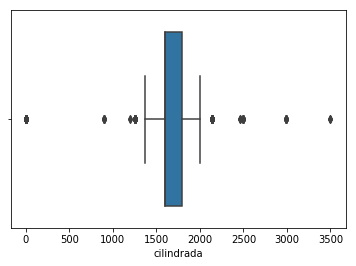

In [19]:
sns.boxplot(df.cilindrada)
df.cilindrada.mean()

### Distribución de la variable *potencia*
*Potencia* tiene una mayor dispersión de valores en función de la media (79 cv), llegando al valor máximo de 193 cv.

78.9737503462097

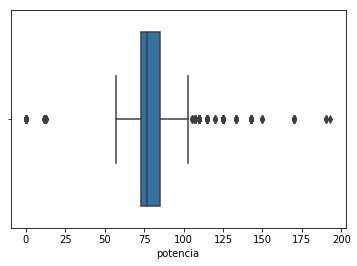

In [20]:
df.potencia.fillna(df.potencia.mean(),inplace=True)
sns.boxplot(df.potencia)
df.potencia.mean()

In [21]:
df.potencia.max()

193.0

# Relaciones entre variables

Definimos parámetros para que los gráficos salgan con mayor visibilidad

In [22]:
rcParams['figure.figsize'] = 14, 10
sns.set_context('talk')

### Relación entre *cilindrada* y *potencia*
Se observa una relación directa entre las variables, con mayor concentración en torno de la media de ambas

Text(0.5, 1.0, 'Relación entre cilindrada y potencia')

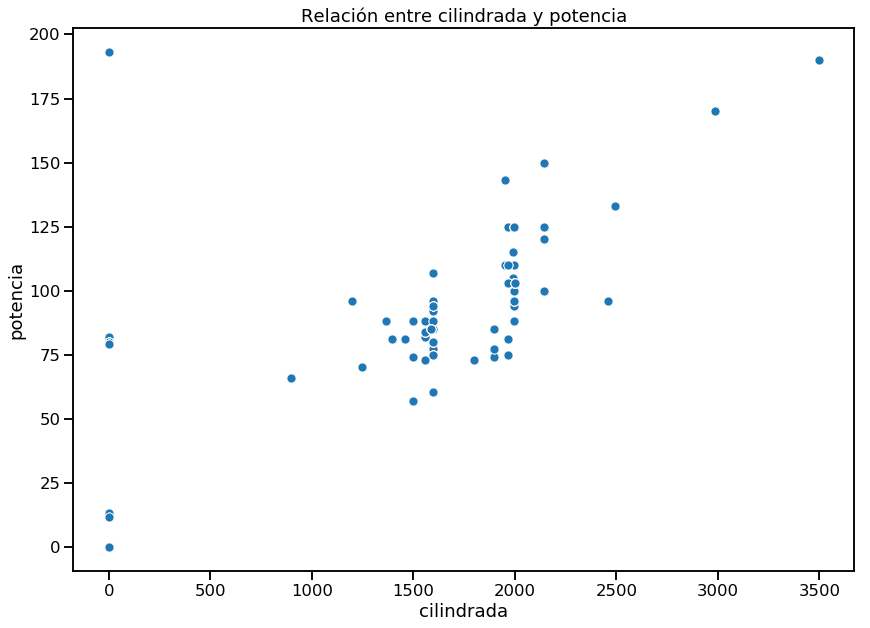

In [28]:
sns.scatterplot(x='cilindrada', y='potencia', data=df).set_title('Relación entre cilindrada y potencia')

### Relación entre *cilindrada* y *potencia* según contaminación
No hay una clara distribución de los niveles de contaminación por cilindrada y potencia.
Sin embargo, los vehículos que menos contaminan, de *nivel 0* aparecen como outliers en el gráfico (bajo nivel de cilindrada para varios niveles de potencia), debido a un número muy reducido de casos, que no es representativo para sacar conclusiones.

ECO    20829
B      14927
C      11116
0         46
Name: clasificacion_medioambiental, dtype: int64

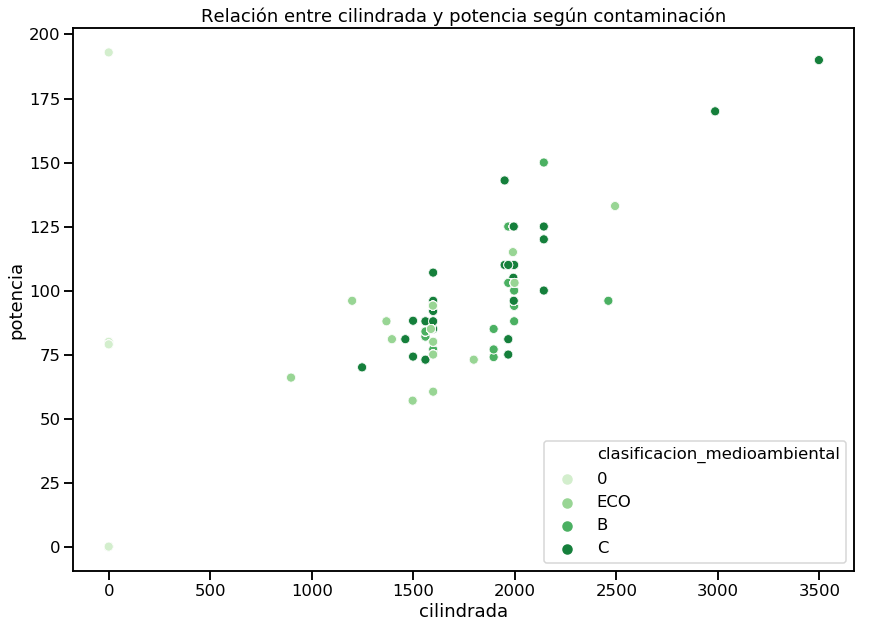

In [24]:
sns.scatterplot(x='cilindrada', y='potencia', data=df, hue = 'clasificacion_medioambiental',legend='brief', hue_order= ['0', 'ECO', 'B', 'C'], palette="Greens").set_title('Relación entre cilindrada y potencia según contaminación')
df.clasificacion_medioambiental.value_counts()

### Marcas de vehículos por clasificación medioambiental

La marca con mayor representación es ***Skoda***, principalmente con vehículos ***C y B*** y un número reducido de vehículos con menor contaminación.

***Toyota*** es la segunda marca más representativa, con vehículos exclusivamente ***Eco***. 

***Seat*** es la tercera marca más representativa y tiene una mayor equilibrio entre número de vehículos de contaminación *C, B y 0*.

SKODA            13279
TOYOTA           12341
SEAT              8095
DACIA             3700
PEUGEOT           2872
CITROEN           2114
VOLKSWAGEN        1570
FIAT              1357
MERCEDES-BENZ      616
FORD               474
RENAULT            381
NISSAN              45
SSANGYONG           44
CHEVROLET           20
HYUNDAI             18
LEXUS               12
PEUGEOT              3
TESLA                1
Name: marca, dtype: int64

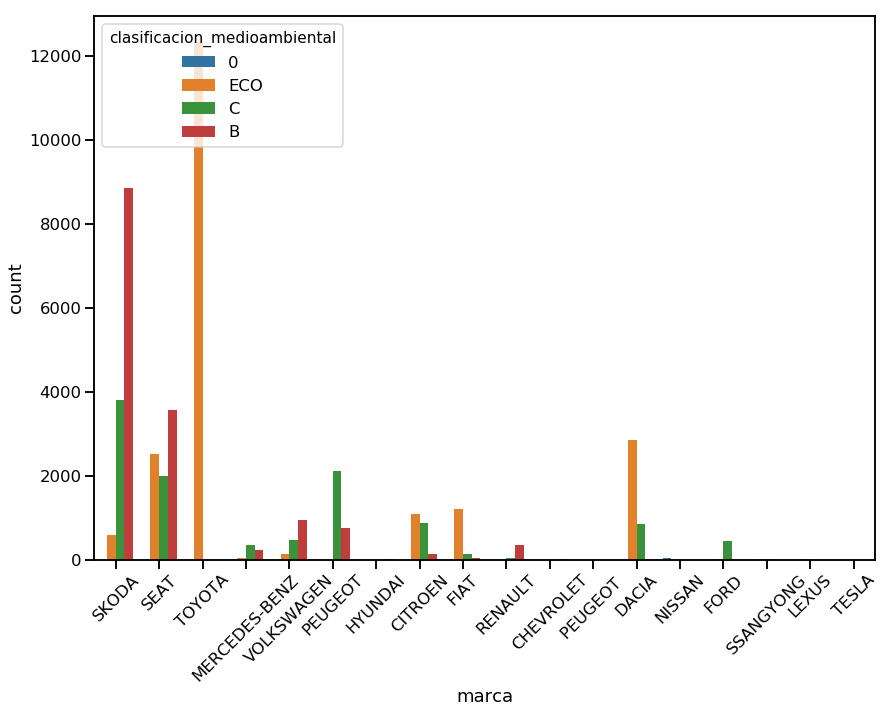

In [25]:
out = sns.countplot(x= 'marca', hue='clasificacion_medioambiental', data=df)
plt.xticks(rotation=45)
df.marca.value_counts()